In [1]:
from mlwpy import *
%matplotlib inline

In [2]:
np.random.randint(1, 7)

4

<BarContainer object of 6 artists>

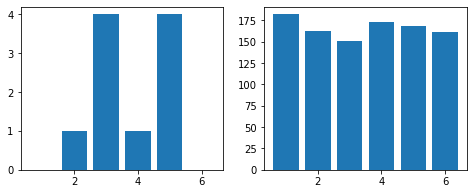

In [3]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size=1000)

few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts)

In [4]:
quantity = [2, 12, 3]
costs = [12.3, .5, 1.75]
partial_cost = []
for q,c in zip(quantity, costs):
    partial_cost.append(q*c)
sum(partial_cost)

35.85

In [5]:
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity * costs)

36.25

In [6]:
print(quantity.dot(costs),
     np.dot(quantity, costs),
     quantity @ costs,
    
    sep = '\n')

36.25
36.25
36.25


In [7]:
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3) # repeated (1/3)

print("weights:", weights)
print("via mean:", np.mean(values))
print("via weights and dot:" , np.dot(weights, values))

weights: [0.3333 0.3333 0.3333]
via mean: 20.0
via weights and dot: 20.0


In [8]:
values = np.array([10, 20, 30])
weights = np.array([.5, .25, .25])
np.dot(weights, values)

17.5

In [9]:
# Illustration of weighted average
# Roll a six-sided die. Heads and you get $1, tails and you lose $0.50. 

# First, get the dot product (weighted sum).
probs = np.array([.5, .5]) # These are the values
payoffs = np.array([1.0, -0.5]) # These are the weights, or the "costs" per value

print(np.dot(payoffs, probs)) # 0.25, the "expected value"

0.25


In [10]:
winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1, 7)
    winnings += 1.0 if die_toss % 2 == 0 else -0.5
print(winnings)

2542.0


In [11]:
'''
Analogy to understand how weight work.

A weight is like the cost of something. Imagine you go to the store.

You want to buy 
2 bags of chips ($2.50 each)
3 jars of salsa ($3.28 each)
4 bags of shredded cheese ($1.50 each) 

Your bill would be a linear combination:
(2 * 2.5) + (3 * 3.28) + (4 * 1.5) = $20.84

Costs represent how much each item "weighs" in the total price. It's how
much value an item has, in other words.

In math we call this "weighted sum" or "dot product".
'''
items = np.array([2, 3, 4])
costs = np.array([2.5, 3.28, 1.5])

print(np.dot(items, costs)) # calculate weighted sum of two arrays

20.84


In [12]:
x = np.arange(1, 11)

In [13]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
y = np.full_like(x, 1/2)

In [15]:
y = np.full_like(x, 1//2)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y = np.full_like(x, 2)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
y = np.ones_like(x)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'Cost\n(Parking Only)')

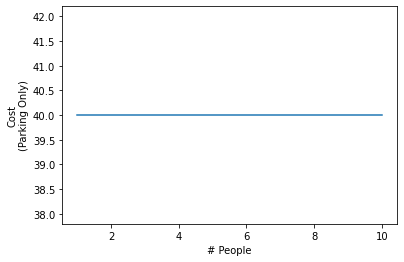

In [18]:
people = np.arange(1, 11)
total_cost = np.full_like(people, 40.0)
ax = plt.gca()
ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel("Cost\n(Parking Only)")

In [19]:
people = np.arange(1, 11)
total_cost = 80.0 * people + 40.0

# .T (transpose) to save vertical space in printout
display(pd.DataFrame({'total_cost':total_cost.astype(np.int)},
                    index=people).T)

,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


Text(0.5, 0, 'People')

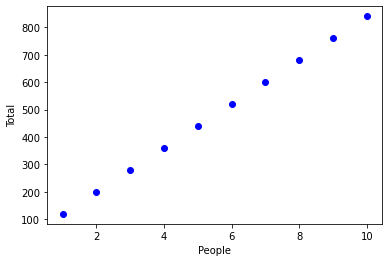

In [20]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_ylabel("Total")
ax.set_xlabel("People")

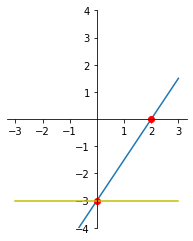

In [21]:
# paint by number
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)

# slope (m) and intercept (b)
m, b = 1.5, -3

ax = plt.gca()
ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4, 4)
high_school_style(ax) # helper function from mlwpy.py

ax.plot(0, -3, 'ro') # y-intercept
ax.plot(2, 0, 'ro') # 2 steps right (1.5 * 2) means 3 steps up

# y = mx + b with m=0 gives b
ys = 0 * xs + b
ax.plot(xs, ys, 'y')

In [22]:
# np.c_[] lets us create an array column-by-column
xs = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]

# view the first few rows
display(pd.DataFrame(xs_p1).head())

,0,1
0,-3.0000,1.0000
1,-2.9394,1.0000
2,-2.8788,1.0000
3,-2.8182,1.0000
4,-2.7576,1.0000


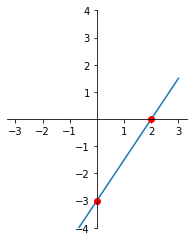

In [23]:
w = np.array([1.5, -3])
ys = np.dot(xs_p1, w)

ax = plt.gca()
ax.plot(xs, ys)

# styling
ax.set_ylim(-4, 4)
high_school_style(ax)

ax.plot(0, -3, 'ro') # y-intercept
ax.plot(2, 0, 'ro')

In [30]:
foo = np.array([1, 2, 3, 4])
foo.shape

(4,)

In [32]:
np.transpose(foo)

array([1, 2, 3, 4])

In [33]:
np.transpose(foo).shape

(4,)

In [40]:
col_vec = np.arange(0, 50, 10).reshape(5, 1)
row_vec = np.arange(0, 5).reshape(1, 5)

oned_vec = np.arange(5)

print(col_vec)
print(row_vec)
print(oned_vec)

[[ 0]
 [10]
 [20]
 [30]
 [40]]
[[0 1 2 3 4]]
[0 1 2 3 4]
